<a href="https://colab.research.google.com/github/roxyconstantine-dev/Proyecto/blob/main/Hungria.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [104]:
# Tratamiento de datos
# ==============================================================================
import numpy as np
import pandas as pd
from tabulate import tabulate

# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
from matplotlib import style
import matplotlib.ticker as ticker
import seaborn as sns
import statsmodels.api as sm

# Preprocesado y modelado
# ==============================================================================
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import make_blobs
from sklearn.metrics import euclidean_distances
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Ridge

#from skopt.space import Real, Integer
#from skopt.utils import use_named_args
#from skopt import gp_minimize
#from skopt.plots import plot_convergence
#import optuna

# Varios
# ==============================================================================
import multiprocessing
import random
from itertools import product
#from fitter import Fitter, get_common_distributions

import matplotlib.pyplot as plt
url="https://github.com/roxyconstantine-dev/Proyecto/blob/main/hungary_chickenpox.csv?raw=true"
datos=pd.read_csv(url)
datos



,Date,BUDAPEST,BARANYA,BACS,BEKES,BORSOD,CSONGRAD,FEJER,GYOR,HAJDU,...,JASZ,KOMAROM,NOGRAD,PEST,SOMOGY,SZABOLCS,TOLNA,VAS,VESZPREM,ZALA
0,03/01/2005,168,79,30,173,169,42,136,120,162,...,130,57,2,178,66,64,11,29,87,68
1,10/01/2005,157,60,30,92,200,53,51,70,84,...,80,50,29,141,48,29,58,53,68,26
2,17/01/2005,96,44,31,86,93,30,93,84,191,...,64,46,4,157,33,33,24,18,62,44
3,24/01/2005,163,49,43,126,46,39,52,114,107,...,63,54,14,107,66,50,25,21,43,31
4,31/01/2005,122,78,53,87,103,34,95,131,172,...,61,49,11,124,63,56,7,47,85,60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
517,01/12/2014,95,12,41,6,39,0,16,15,14,...,56,7,13,122,4,23,4,11,110,10
518,08/12/2014,43,39,31,10,34,3,2,30,25,...,34,20,18,70,36,5,23,22,63,9
519,15/12/2014,35,7,15,0,0,0,7,7,4,...,30,36,4,72,5,21,14,0,17,10
520,22/12/2014,30,23,8,0,11,4,1,9,10,...,27,17,21,12,5,17,1,1,83,2


# **Análisis exploratorio**
Antes de entrenar un modelo predictivo, o incluso antes de realizar cualquier cálculo con un nuevo conjunto de datos, es muy importante realizar una exploración descriptiva de los mismos. Este proceso permite entender mejor qué información contiene cada variable, así como detectar posibles errores. Algunos ejemplos frecuentes son:

Que una columna se haya almacenado con el tipo incorrecto: una variable numérica está siendo reconocida como texto o viceversa.

Que una variable contenga valores que no tienen sentido: por ejemplo, para indicar que no se dispone del precio de una vivienda se introduce el valor 0 o un espacio en blanco.

Que en una variable de tipo numérico se haya introducido una palabra en lugar de un número.

Además, este análisis inicial puede dar pistas sobre qué variables son adecuadas como predictores en un modelo (más sobre esto en los siguientes apartados).


In [103]:
datos.head(4)

,Date,BUDAPEST,BARANYA,BACS,BEKES,BORSOD,CSONGRAD,FEJER,GYOR,HAJDU,...,JASZ,KOMAROM,NOGRAD,PEST,SOMOGY,SZABOLCS,TOLNA,VAS,VESZPREM,ZALA
0,03/01/2005,168,79,30,173,169,42,136,120,162,...,130,57,2,178,66,64,11,29,87,68
1,10/01/2005,157,60,30,92,200,53,51,70,84,...,80,50,29,141,48,29,58,53,68,26
2,17/01/2005,96,44,31,86,93,30,93,84,191,...,64,46,4,157,33,33,24,18,62,44
3,24/01/2005,163,49,43,126,46,39,52,114,107,...,63,54,14,107,66,50,25,21,43,31


# **Tipo de cada columna**

In [99]:
# Tipo de cada columna
# ==============================================================================
# En pandas, el tipo "object" hace referencia a strings
# datos.dtypes
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 522 entries, 0 to 521
Data columns (total 21 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Date      522 non-null    object
 1   BUDAPEST  522 non-null    int64 
 2   BARANYA   522 non-null    int64 
 3   BACS      522 non-null    int64 
 4   BEKES     522 non-null    int64 
 5   BORSOD    522 non-null    int64 
 6   CSONGRAD  522 non-null    int64 
 7   FEJER     522 non-null    int64 
 8   GYOR      522 non-null    int64 
 9   HAJDU     522 non-null    int64 
 10  HEVES     522 non-null    int64 
 11  JASZ      522 non-null    int64 
 12  KOMAROM   522 non-null    int64 
 13  NOGRAD    522 non-null    int64 
 14  PEST      522 non-null    int64 
 15  SOMOGY    522 non-null    int64 
 16  SZABOLCS  522 non-null    int64 
 17  TOLNA     522 non-null    int64 
 18  VAS       522 non-null    int64 
 19  VESZPREM  522 non-null    int64 
 20  ZALA      522 non-null    int64 
dtypes: int64(20), ob

In [102]:
dia=[]
mes=[]
anio=[]
for i in datos['Date']:
    fecha = i.split("/")
    dia.append(fecha[0])
    mes.append(fecha[1])
    anio.append(fecha[2])
datos_2 = datos_1.assign(DIA=dia, MES=mes,ANIO=anio)
#datos_1= pd.concat([datos,pd.DataFrame(dia), pd.DataFrame(mes), pd.DataFrame(anio)], axis=1, join="inner")
datos_2

,Date,BUDAPEST,BARANYA,BACS,BEKES,BORSOD,CSONGRAD,FEJER,GYOR,HAJDU,...,ZALA,0,0,0,column_new_1,column_new_2,column_new_3,DIA,MES,ANIO
0,03/01/2005,168,79,30,173,169,42,136,120,162,...,68,03,01,2005,03,01,2005,03,01,2005
1,10/01/2005,157,60,30,92,200,53,51,70,84,...,26,10,01,2005,10,01,2005,10,01,2005
2,17/01/2005,96,44,31,86,93,30,93,84,191,...,44,17,01,2005,17,01,2005,17,01,2005
3,24/01/2005,163,49,43,126,46,39,52,114,107,...,31,24,01,2005,24,01,2005,24,01,2005
4,31/01/2005,122,78,53,87,103,34,95,131,172,...,60,31,01,2005,31,01,2005,31,01,2005
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
517,01/12/2014,95,12,41,6,39,0,16,15,14,...,10,01,12,2014,01,12,2014,01,12,2014
518,08/12/2014,43,39,31,10,34,3,2,30,25,...,9,08,12,2014,08,12,2014,08,12,2014
519,15/12/2014,35,7,15,0,0,0,7,7,4,...,10,15,12,2014,15,12,2014,15,12,2014
520,22/12/2014,30,23,8,0,11,4,1,9,10,...,2,22,12,2014,22,12,2014,22,12,2014


,Date,BUDAPEST,BARANYA,BACS,BEKES,BORSOD,CSONGRAD,FEJER,GYOR,HAJDU,...,ZALA,0,0,0,column_new_1,column_new_2,column_new_3,DIA,MES,ANIO
0,03/01/2005,168,79,30,173,169,42,136,120,162,...,68,03,01,2005,03,01,2005,03,01,2005
1,10/01/2005,157,60,30,92,200,53,51,70,84,...,26,10,01,2005,10,01,2005,10,01,2005
2,17/01/2005,96,44,31,86,93,30,93,84,191,...,44,17,01,2005,17,01,2005,17,01,2005
3,24/01/2005,163,49,43,126,46,39,52,114,107,...,31,24,01,2005,24,01,2005,24,01,2005
4,31/01/2005,122,78,53,87,103,34,95,131,172,...,60,31,01,2005,31,01,2005,31,01,2005
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
517,01/12/2014,95,12,41,6,39,0,16,15,14,...,10,01,12,2014,01,12,2014,01,12,2014
518,08/12/2014,43,39,31,10,34,3,2,30,25,...,9,08,12,2014,08,12,2014,08,12,2014
519,15/12/2014,35,7,15,0,0,0,7,7,4,...,10,15,12,2014,15,12,2014,15,12,2014
520,22/12/2014,30,23,8,0,11,4,1,9,10,...,2,22,12,2014,22,12,2014,22,12,2014


In [58]:
datos_1.columns.tolist()


['Date',
 'BUDAPEST',
 'BARANYA',
 'BACS',
 'BEKES',
 'BORSOD',
 'CSONGRAD',
 'FEJER',
 'GYOR',
 'HAJDU',
 'HEVES',
 'JASZ',
 'KOMAROM',
 'NOGRAD',
 'PEST',
 'SOMOGY',
 'SZABOLCS',
 'TOLNA',
 'VAS',
 'VESZPREM',
 'ZALA',
 0,
 0,
 0]

In [86]:
datos_1.rename(columns={0:'DIA',0:'MES',0:'ANIO'},inplace=True)
datos_1

,Date,BUDAPEST,BARANYA,BACS,BEKES,BORSOD,CSONGRAD,FEJER,GYOR,HAJDU,...,PEST,SOMOGY,SZABOLCS,TOLNA,VAS,VESZPREM,ZALA,ANIO,ANIO,ANIO
0,03/01/2005,168,79,30,173,169,42,136,120,162,...,178,66,64,11,29,87,68,03,01,2005
1,10/01/2005,157,60,30,92,200,53,51,70,84,...,141,48,29,58,53,68,26,10,01,2005
2,17/01/2005,96,44,31,86,93,30,93,84,191,...,157,33,33,24,18,62,44,17,01,2005
3,24/01/2005,163,49,43,126,46,39,52,114,107,...,107,66,50,25,21,43,31,24,01,2005
4,31/01/2005,122,78,53,87,103,34,95,131,172,...,124,63,56,7,47,85,60,31,01,2005
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
517,01/12/2014,95,12,41,6,39,0,16,15,14,...,122,4,23,4,11,110,10,01,12,2014
518,08/12/2014,43,39,31,10,34,3,2,30,25,...,70,36,5,23,22,63,9,08,12,2014
519,15/12/2014,35,7,15,0,0,0,7,7,4,...,72,5,21,14,0,17,10,15,12,2014
520,22/12/2014,30,23,8,0,11,4,1,9,10,...,12,5,17,1,1,83,2,22,12,2014


/usr/local/lib/python3.9/dist-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.9/dist-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


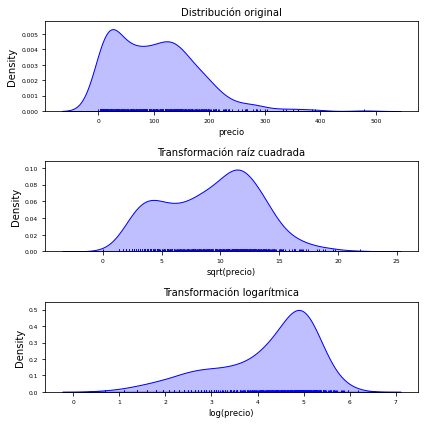

In [60]:
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(6, 6))
sns.kdeplot(
    datos_1.BUDAPEST,
    fill    = True,
    color   = "blue",
    ax      = axes[0]
)
sns.rugplot(
    datos_1.BUDAPEST,
    color   = "blue",
    ax      = axes[0]
)
axes[0].set_title("Distribución original", fontsize = 'medium')
axes[0].set_xlabel('precio', fontsize='small') 
axes[0].tick_params(labelsize = 6)

sns.kdeplot(
    np.sqrt(datos_1.BUDAPEST),
    fill    = True,
    color   = "blue",
    ax      = axes[1]
)
sns.rugplot(
    np.sqrt(datos_1.BUDAPEST),
    color   = "blue",
    ax      = axes[1]
)
axes[1].set_title("Transformación raíz cuadrada", fontsize = 'medium')
axes[1].set_xlabel('sqrt(precio)', fontsize='small') 
axes[1].tick_params(labelsize = 6)

sns.kdeplot(
    np.log(datos_1.BUDAPEST),
    fill    = True,
    color   = "blue",
    ax      = axes[2]
)
sns.rugplot(
    np.log(datos_1.BUDAPEST),
    color   = "blue",
    ax      = axes[2]
)
axes[2].set_title("Transformación logarítmica", fontsize = 'medium')
axes[2].set_xlabel('log(precio)', fontsize='small') 
axes[2].tick_params(labelsize = 6)

fig.tight_layout()

In [66]:
distribuciones = ['cauchy', 'chi2', 'expon',  'exponpow', 'gamma',
                  'norm', 'powerlaw', 'beta', 'logistic']

fitter = Filtter(datos_1.BUDAPEST, distributions=distribuciones)
fitter.fit()
fitter.summary(Nbest=10, plot=False)

NameError: ignored

IndexError: ignored

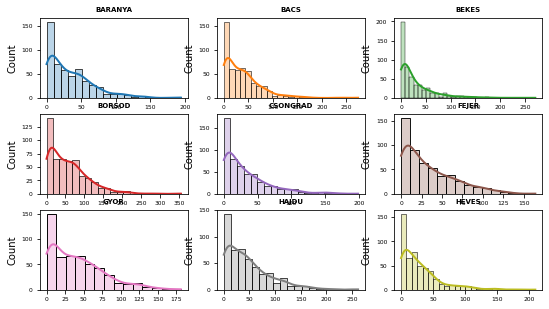

In [107]:
# Gráfico de distribución para cada variable numérica
# ==============================================================================
# Ajustar número de subplots en función del número de columnas
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(9, 5))
axes = axes.flat
columnas_numeric = datos_1.select_dtypes(include=['float64', 'int']).columns
columnas_numeric = columnas_numeric.drop('BUDAPEST')

for i, colum in enumerate(columnas_numeric):
    sns.histplot(
        data     = datos,
        x        = colum,
        stat     = "count",
        kde      = True,
        color    = (list(plt.rcParams['axes.prop_cycle'])*2)[i]["color"],
        line_kws = {'linewidth': 2},
        alpha    = 0.3,
        ax       = axes[i]
    )
    axes[i].set_title(colum, fontsize = 7, fontweight = "bold")
    axes[i].tick_params(labelsize = 6)
    axes[i].set_xlabel("")
    
    
fig.tight_layout()
plt.subplots_adjust(top = 0.9)
fig.suptitle('Distribución variables numéricas', fontsize = 10, fontweight = "bold");

In [67]:
# Correlación entre columnas numéricas
# ==============================================================================
def tidy_corr_matrix(corr_mat):
    '''
    Función para convertir una matrix de correlación de pandas en formato tidy
    '''
    corr_mat = corr_mat.stack().reset_index()
    corr_mat.columns = ['variable_1','variable_2','r']
    corr_mat = corr_mat.loc[corr_mat['variable_1'] != corr_mat['variable_2'], :]
    corr_mat['abs_r'] = np.abs(corr_mat['r'])
    corr_mat = corr_mat.sort_values('abs_r', ascending=False)
    
    return(corr_mat)

corr_matrix = datos_1.select_dtypes(include=['float64', 'int']).corr(method='pearson')
tidy_corr_matrix(corr_matrix).head(10)

,variable_1,variable_2,r,abs_r
13,BUDAPEST,PEST,0.765108,0.765108
260,PEST,BUDAPEST,0.765108,0.765108
146,GYOR,FEJER,0.716062,0.716062
127,FEJER,GYOR,0.716062,0.716062
151,GYOR,KOMAROM,0.700550,0.700550
227,KOMAROM,GYOR,0.700550,0.700550
33,BARANYA,PEST,0.698257,0.698257
261,PEST,BARANYA,0.698257,0.698257
153,GYOR,PEST,0.673638,0.673638
267,PEST,GYOR,0.673638,0.673638


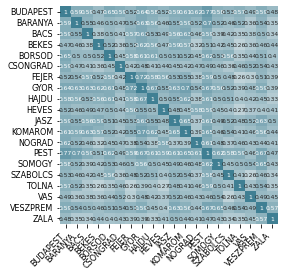

In [68]:
# Heatmap matriz de correlaciones
# ==============================================================================
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(4, 4))

sns.heatmap(
    corr_matrix,
    annot     = True,
    cbar      = False,
    annot_kws = {"size": 6},
    vmin      = -1,
    vmax      = 1,
    center    = 0,
    cmap      = sns.diverging_palette(20, 220, n=200),
    square    = True,
    ax        = ax
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation = 45,
    horizontalalignment = 'right',
)

ax.tick_params(labelsize = 8)

In [71]:
# Reparto de datos en train y test
# ==============================================================================
from sklearn.model_selection import train_test_split
datos_2=datos_1.drop(['Date'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(
                                        datos_2.drop('BUDAPEST', axis = 'columns'),
                                        datos_2['BUDAPEST'],
                                        train_size   = 0.8,
                                        random_state = 1234,
                                        shuffle      = True
                                    )


In [72]:
print("Partición de entrenamento")
print("-----------------------")
print(y_train.describe())

Partición de entrenamento
-----------------------
count    417.000000
mean      97.057554
std       73.725951
min        0.000000
25%       31.000000
50%       87.000000
75%      144.000000
max      479.000000
Name: BUDAPEST, dtype: float64


In [73]:
print("Partición de test")
print("-----------------------")
print(y_test.describe())

Partición de test
-----------------------
count    105.000000
mean     117.876190
std       84.349057
min        2.000000
25%       48.000000
50%      114.000000
75%      175.000000
max      391.000000
Name: BUDAPEST, dtype: float64


In [74]:
# Selección de las variables por tipo
# ==============================================================================
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.compose import make_column_selector

# Se estandarizan las columnas numéricas y se hace one-hot-encoding de las 
# columnas cualitativas. Para mantener las columnas a las que no se les aplica 
# ninguna transformación se tiene que indicar remainder='passthrough'.
numeric_cols = X_train.select_dtypes(include=['float64', 'int']).columns.to_list()
cat_cols = X_train.select_dtypes(include=['object', 'category']).columns.to_list()

preprocessor = ColumnTransformer(
                   [('scale', StandardScaler(), numeric_cols),
                    ('onehot', OneHotEncoder(handle_unknown='ignore'), cat_cols)],
                remainder='passthrough')

In [106]:
X_train.info()
df['a'] = df['a'].astype(float, errors = 'raise')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 417 entries, 74 to 294
Data columns (total 22 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   BARANYA   417 non-null    int64 
 1   BACS      417 non-null    int64 
 2   BEKES     417 non-null    int64 
 3   BORSOD    417 non-null    int64 
 4   CSONGRAD  417 non-null    int64 
 5   FEJER     417 non-null    int64 
 6   GYOR      417 non-null    int64 
 7   HAJDU     417 non-null    int64 
 8   HEVES     417 non-null    int64 
 9   JASZ      417 non-null    int64 
 10  KOMAROM   417 non-null    int64 
 11  NOGRAD    417 non-null    int64 
 12  PEST      417 non-null    int64 
 13  SOMOGY    417 non-null    int64 
 14  SZABOLCS  417 non-null    int64 
 15  TOLNA     417 non-null    int64 
 16  VAS       417 non-null    int64 
 17  VESZPREM  417 non-null    int64 
 18  ZALA      417 non-null    int64 
 19  0         417 non-null    object
 20  0         417 non-null    object
 21  0         417 n

KeyError: ignored

In [105]:
X_train_prep = preprocessor.fit_transform(X_train)
X_test_prep  = preprocessor.transform(X_test)

TypeError: ignored

In [ ]:
# Gráfico de distribución para cada variable numérica
# ==============================================================================
# Ajustar número de subplots en función del número de columnas
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(9, 5))
axes = axes.flat
columnas_numeric = datos_1.select_dtypes(include=['float64', 'int']).columns
columnas_numeric = columnas_numeric.drop('BUDAPEST')

for i, colum in enumerate(columnas_numeric):
    sns.regplot(
        x           = datos[colum],
        y           = datos['precio'],
        color       = "gray",
        marker      = '.',
        scatter_kws = {"alpha":0.4},
        line_kws    = {"color":"r","alpha":0.7},
        ax          = axes[i]
    )
    axes[i].set_title(f"precio vs {colum}", fontsize = 7, fontweight = "bold")
    #axes[i].ticklabel_format(style='sci', scilimits=(-4,4), axis='both')
    axes[i].yaxis.set_major_formatter(ticker.EngFormatter())
    axes[i].xaxis.set_major_formatter(ticker.EngFormatter())
    axes[i].tick_params(labelsize = 6)
    axes[i].set_xlabel("")
    axes[i].set_ylabel("")

# Se eliminan los axes vacíos
for i in [8]:
    fig.delaxes(axes[i])
    
fig.tight_layout()
plt.subplots_adjust(top=0.9)
fig.suptitle('Correlación con precio', fontsize = 10, fontweight = "bold");